general todo, organize class, maybe subclass, some static methods
write documentation

## Import all the relevant Modules 

In [1]:
%matplotlib inline

# adding `Modules/` to the system path
#import sys
#sys.path.insert(0, './Modules/')

#TODO: Rename module shortcuts such as hb into something usefull after development
import Modules.Hubbard_Class as hb
import Modules.Widgets as w
import ipywidgets as widgets
import numpy as np

# Plotting
import matplotlib.pyplot as plt
plt.style.use('seaborn-dark')
plt.rcParams.update({'font.size':14})

from ipywidgets import HBox, VBox
import functools

%load_ext autoreload
%autoreload 2
#TODO rename one of the modules folders

TODO: give a good description of the model we're looking at
## Introduction

The following are all markdown todos
* TODO: Check name of basis states
* TODO: Show how basis is created
* #TODO state that total number of basis states is ncr(n,s1) ncr (n,s2)
## The Fock Basis states 

In [2]:
h1 = hb.Hubbard()

In [ ]:
basis_widget = widgets.interactive(h1.show_basis, index=h1.basis_index, n=h1.n, s_up=h1.s_up, s_down=h1.s_down);

display(basis_widget)
#TODO check how to close all widgets, even if they are not already opened

## Hopping Hamiltonian

Markdown Taks:
* TODO: possibly show the simple n=2 analytic calculation for the hubbard molecule in occupation number basis
* TODO: Show the operator nn, na, nb etc


* TODO: Show the operator nn, na, nb etc, show S_a. S_b, S^2

* TODO: Do not show hopping, boring!

In the Widget below one can play around with the number of sites $n$, spin up and spin down states, as well as the interaction strength $U$ and the hopping amplitude $t$ to explore the hamiltonian $H$. Note that only for $n \leq 4$ the complete matrix can be fully displayed.

In [ ]:
#close previous widget to prevent slowing down calculations
#basis_widget.close()

np.set_printoptions(linewidth=150) #set output length, default=75
H_widget = widgets.interactive(h1.Show_H, u=h1.u, t=h1.t, n=h1.n, s_up=h1.s_up, s_down=h1.s_down);
display(H_widget)

# Calculate Eigenenergies 
TODO: for Hu in widget (copy paste)
TODO: for Ht with widget (copy paste) 

In [4]:
# adding `Modules/` to the system path
import sys
sys.path.insert(0, '../Modules/')

from Module_Widgets_and_Sliders import Text_Box, Save_Figure_Button, Click_Save_Figure, set_filename#
#from Widgets import steps_Slider

In [8]:
#H_widget.close()

Hu_widget = widgets.interactive(h1.Plot_Eigvals_Hu, u=h1.u_range, n=h1.n, s_up=h1.s_up, s_down=h1.s_down);

filename = set_filename("Hubbard.pdf")
Save_Figure_Button.on_click(functools.partial(Click_Save_Figure, widget=Hu_widget, name_widget=filename, output=h1.out, path=""))

display(HBox([Save_Figure_Button, filename, h1.out]))
display(Hu_widget)

interactive(children=(FloatRangeSlider(value=(2.0, 7.0), continuous_update=False, description='$U=$', max=40.0…

In [ ]:
Ht_widget = widgets.interactive(h1.Plot_Eigvals_Ht, t=h1.t_range, n=h1.n, s_up=h1.s_up, s_down=h1.s_down);

filename = set_filename("Hubbard.pdf")
Save_Figure_Button.on_click(functools.partial(Click_Save_Figure, widget=Ht_widget, name_widget=filename, output=h1.out, path=""))

display(HBox([Save_Figure_Button, filename, h1.out]))
display(Ht_widget)

In [ ]:
Ht_widget.close()

H_all_widget = widgets.interactive(h1.Plot_Eigvals_H, u=h1.t_range, t=h1.u_range, n=h1.n, s_up=h1.s_up, s_down=h1.s_down);

filename = set_filename("Hubbard.pdf")
Save_Figure_Button.on_click(functools.partial(Click_Save_Figure, widget=H_all_widget, name_widget=filename, output=h1.out, path=""))

display(HBox([Save_Figure_Button, filename, h1.out]))
display(H_all_widget)

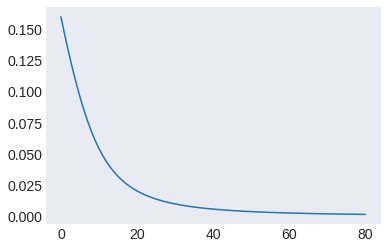

In [289]:
plt.plot(h1.Exp_Val_0(h1.DoubleSiteAvg));

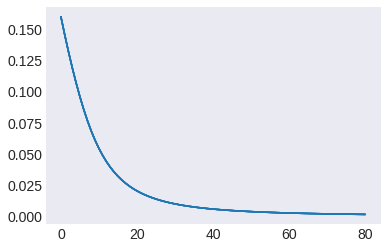

In [291]:
for i in np.arange(5):
	plt.plot(h1.Exp_Val_0(h1.Double(i)));

In [293]:
np.round(h1.DoubleSiteAvg,2)

array([[0.67, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.33, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.33, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.33, 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.67, 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.33, 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.33, 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.33, 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.67]])

In [295]:
np.round(h1.Double(1),2)

array([[1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1.]])

In [31]:
import functools


class CachedAttribute(object):
    ''' Computes attribute value and caches it in the instance. '''

    def __init__(self, method, name=None):
        # record the unbound-method and the name
        self.method = method
        self.name = name or method.__name__
        self.test = True

    def __get__(self, inst, cls):
        if inst is None:
            # instance attribute accessed on class, return self
            return self
        # compute, cache and return the instance's attribute value
        result = self.method(inst)
        setattr(inst, self.name, result)
        return result


def Cach(func):
    return functools.wraps(func)(CachedAttribute(func))

In [46]:
# our decorator
def cool(func, *args, **kwargs):
    def decorated_func(*args, **kwargs):
        print("cool pre-function decorator tasks here.")
        return_value = func(*args, **kwargs)
        print("cool post-function decorator tasks here.")
        return return_value
    # add is_cool property to function so that we can check for its existence later
    decorated_func.is_cool = True
    return decorated_func

# our class, in which we will use the decorator
class MyClass:
    def __init__(self, name):
        self.name = name

    # this method isn't decorated with the cool decorator, so it won't show up 
    # when we retrieve all the cool methods
    def do_something_boring(self, task):
        print(f"{self.name} does {task}")
    
    @Cach
    # thanks to *args and **kwargs, the decorator properly passes method parameters
    def say_catchphrase(self, *args, catchphrase="I'm so cool you could cook an egg on me.", **kwargs):
        print(f"{self.name} says \"{catchphrase}\"")

    @Cach
    # the decorator also properly handles methods with return values
    def explode(self, *args, **kwargs):
        print(f"{self.name} explodes.")
        return 4

    def get_all_cool_methods(self):
        """Get all methods decorated with the "cool" decorator.
        """
        cool_methods =  {name: getattr(self, name)
                            # get all attributes, including methods, properties, and builtins
                            for name in dir(self)
                                # but we only want methods
                                if getattr(self, name).test
        }
        return cool_methods


In [43]:
jeff = MyClass(name="Jeff")
cool_methods = jeff.get_all_cool_methods()    
for method_name, cool_method in cool_methods.items():
	print(f"{method_name}: {cool_method} ...")
	# you can call the decorated methods you retrieved, just like normal,
	# but you don't need to reference the actual instance to do so
	return_value = cool_method()
	print(f"return value = {return_value}\n")

Jeff explodes.
Jeff says "I'm so cool you could cook an egg on me."
__class__: <class '__main__.MyClass'> ...


TypeError: __init__() missing 1 required positional argument: 'name'

In [47]:
jeff = MyClass(name="Jeff")
jeff.get_all_cool_methods()  

AttributeError: 'str' object has no attribute 'test'

True